## Содержание:
1. [Обзор данных](#start)
2. [Предобработка данных](#preprocessing)
* [Заполнение пропусков](#passes)
* [Проверка данных на аномалии и исправления](#anomalie)
* [Изменение типов данных](#type)
* [Удаление дубликатов](#dupl)
* [Формирование дополнительных датафреймов словарей](#dict)
* [Категоризация дохода](#income)
* [Категоризация целей кредита](#category)
3. [Исследовательский анализ данных](#analysis)
* [Есть ли зависимость между количеством детей и возвратом кредита в срок?](#question1)
* [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#question2)
* [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#question3)
* [Как разные цели кредита влияют на его возврат в срок? ](#question4)
4. [Итоги исследования](#total)

# Исследование надежности заемщиков.

Изучим данные статистики о платёжеспособности клиентов. Выясним, от каких факторов зависит погашение кредита заемщиком.

Ответим на четыре вопроса:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

## Описание данных:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

## Шаг 1. Обзор данных <a id="start"></a>

In [42]:
# импорт библиотеки
import pandas as pd
from pymystem3 import Mystem

In [43]:
# чтение файла с данными и сохранение в data
data = pd.read_csv('data.csv')
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [44]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 12 столбцов и 21525 строк, тип данных - есть числовой и строковой. Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения. Пропуски есть в столбцах `days_employed` и `total_income`.

В таблице есть количественные и катериальные данные. Столбцы `days_employed` и `total_income` хранят количественные значения. Пропуски в этих столбцах могли появиться из-за не заполнениях этих данных самими гражданнами

In [45]:
# проверим данные на пропуски
round((data.isna().mean()*100),2)

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

In [46]:
# посчитаем количество дубликатов
data.duplicated().sum()

54

Провели проверку на пропуски, их около 10% от общего объема. Проверка на дубликаты выявила 54 дубликата.

## Шаг 2. Предобработка данных <a id="preprocessing"></a>

### Шаг 2.1 Заполнение пропусков <a id="passes"></a>

In [47]:
# пропуски по столбцу `days_employed`
data[data['days_employed'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Пропуски в таблице обозначенны NaN, они имееют тип float, для расчетов они не помешают.
Пропуски в столбцах составляют 10% от общего объема информации, это значительная доля. Чтобы не потерять информацию в строках с пропусками, заменим пропуски медиальными значениями этих столбцов.
Это подходящий способ замены пропусков в количественных переменных, где могут быть данные с большими расхождениями в значениях.

In [48]:
# заменим пропуски медианным занчением
median_days_employed = data['days_employed'].median()
data['days_employed'] = data['days_employed'].fillna(median_days_employed)

In [49]:
# заменим пропуски медианным занчением
median_total_income = data['total_income'].median()
data['total_income'] = data['total_income'].fillna(median_total_income)

In [50]:
round((data.isna().mean()*100),2)

children            0.0
days_employed       0.0
dob_years           0.0
education           0.0
education_id        0.0
family_status       0.0
family_status_id    0.0
gender              0.0
income_type         0.0
debt                0.0
total_income        0.0
purpose             0.0
dtype: float64

Заменили пропуски в столбцах на медианные значения, и еще раз проверили на пропуски, пропусков больше нет.

### Шаг 2.2 Проверка данных на аномалии и исправления. <a id="anomalie"></a>

In [51]:
# выведем набор наименований образования
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

В столбце `education` исползуется разный регистр букв, приведем все данные к единому виду.

In [52]:
# приведем данные к нижнему регистру
data['education'] = data['education'].str.lower()

In [53]:
# проверка внесенных изменений
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [54]:
# проверим столбец `family_status` на анномалии
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [55]:
# проверим столбец `gender` на анномалии
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [56]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


В столбец gender есть аномальное значение, XNA есть только в одной строчке таблицы. Заменить это значение другим по смыслу сложно, заполнить средним или медианой нельзя, это категориальные данные. Поэтому удалим ее.

In [57]:
# удаляем строку с анномальным значением в столбце gender
data = data.dropna(subset=['gender']).reset_index(drop=True)

In [58]:
# проверим столбец `income_type` на анномалии
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [59]:
# проверим столбец `children` на анномалии
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце children имеется два аномальных значения. -1 ребенок такого не бывает, а 20 детей это много, заменим это значения на более реальные. -1 на 1 ребенок, 20 на 2 ребенка.

In [60]:
# заменим анномальные значения
data['children'] = data['children'].replace(-1, 1)
data['children'] = data['children'].replace(20, 2)
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [61]:
# проверим столбец `dob_years` на анномалии
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

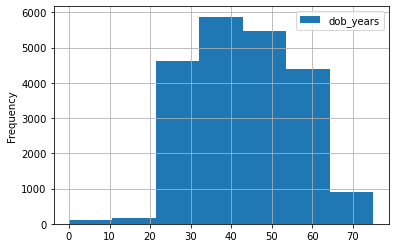

In [62]:
# посмотрим на графике распределение данных о возрасте клиентов
data.plot(y='dob_years', grid=True, kind='hist', bins=7)

In [63]:
# строки где возраст клиентов равен 0
len(data[data['dob_years']== 0])

101

По гистограмме видно, что есть некоторое количестово значений возроста в районе нуля.
В столбце "возраст" есть строки с нулевым значением, таких столбцов много, заменим в них нулевой возраст на медианное значение.

In [64]:
# заменим 0 значения меданым возрастом
median_dob_years = data['dob_years'].median()
print(f'Медианный возраст клиентов {median_dob_years}')
data['dob_years'] = data['dob_years'].replace(0, median_dob_years)


Медианный возраст клиентов 42.0


In [65]:
# проверка замены
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75], dtype=int64)

In [66]:
# проверим столбец `purpose` на анномалии
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [67]:
# проверка на пропуски
data['debt'].isna().sum()

0

**Вывод** Проверили все столбцы в таблице на анномальные значения, и исправили их. В основном, делали это для очистки датафрейма, и для дальнейшей правильной работы с данными, что бы получить корректные результаты.

### Шаг 2.3. Изменение типов данных.  <a id="type"></a>

In [68]:
# именяем тип занных столбца `total_income` на int
data['total_income'] = data['total_income'].astype('int')

In [69]:
# проверка замены
data['total_income'].dtype

dtype('int32')

Замена типа произошла, столбец total_income имеет целочисленый тип.

### Шаг 2.4. Удаление дубликатов. <a id="dupl"></a>

In [70]:
# проверка на дубликаты
data.duplicated().sum()

72

Дубликатов стало больше, это связано с проведенной нами перобработкой данных, с переходом на нижний регистор и заменой пропушенных значений.

In [71]:
# таблица с дубликатами
duplicated_data = data[data.duplicated()].head()
duplicated_data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,-1203.369529,41,среднее,1,женат / замужем,0,F,сотрудник,0,145017,покупка жилья для семьи
3290,0,-1203.369529,58,среднее,1,гражданский брак,1,F,пенсионер,0,145017,сыграть свадьбу
4182,1,-1203.369529,34,высшее,0,гражданский брак,1,F,сотрудник,0,145017,свадьба
4851,0,-1203.369529,60,среднее,1,гражданский брак,1,F,пенсионер,0,145017,свадьба
5557,0,-1203.369529,58,среднее,1,гражданский брак,1,F,пенсионер,0,145017,сыграть свадьбу


In [72]:
# посчитаем процент дубликатов
round((data.duplicated().mean()*100),2)

0.33

In [73]:
# удалим дубликаты
data = data.drop_duplicates().reset_index(drop=True)

In [74]:
# проверка
data.duplicated().sum()

0

Количество дубликатов после обработки 0.

Возможно, что дубликаты появились после обработки данных, заполнения пропусков, и изменения регистра букв в столбцах. Возможно, это не дубликаты, а разные люди со схожими данными, которые берут кредит. Из таблице это сложно понять. Но дубликаты составляют менее 1% от общего числа данных, утрата этого количества данных не повлияется на результат анализа.

По итогом предобработки данных, мы проработали задачу с пропусками, с анномальными значениями, явными и не явными дубликатами.

### Шаг 2.5. Формирование дополнительных датафреймов словарей. <a id="dict"></a>

In [75]:
# создадим словари для обозначения семейного положения и уровня образования
education_dict = data[['education_id','education']].drop_duplicates().reset_index(drop=True)
family_status_dict = data[['family_status_id','family_status']].drop_duplicates().reset_index(drop=True)


In [76]:
family_status_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


In [77]:
education_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [78]:
# удалим столбцы с текстовым описанием семейного положения и образования, 
# в датафрейме остануться только их категориальные аналоги
data = data.drop(columns=['education', 'family_status'])
data.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода. <a id="income"></a>

In [79]:
# функция для формирования категорий по доходам клиентов
def total_income_category(total_income):
    if total_income <= 30000:
        return 'E'
    if 30001 <= total_income <= 50000:
        return 'D'
    if 50001 <= total_income <= 200000:
        return 'C'
    if 200001 <= total_income <= 1000000:
        return 'B'
    return 'A'


In [80]:
# создадим новый столбец с категориями доходов
data['total_income_category'] = data['total_income'].apply(total_income_category)

In [81]:
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,-8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,-4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,-5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,-4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита. <a id="category"></a>

In [82]:
# для категоризации целей кредита будем использовать метод лемматизации
m = Mystem()
data['lemmas'] = data['purpose'].apply(m.lemmatize)


RuntimeError: Problem has been occured. Current state:
text:
b'\xd0\xbf\xd0\xbe\xd0\xba\xd1\x83\xd0\xbf\xd0\xba\xd0\xb0 \xd0\xb6\xd0\xb8\xd0\xbb\xd1\x8c\xd1\x8f'
out:
b''

In [ ]:
# функция для формирования категорий на основе выделеных лемм 
def purpose_category(lemmas):
    if 'жилье' in lemmas or 'недвижимость' in lemmas:
        return 'операции с недвижимостью'
    if 'автомобиль' in lemmas:
        return 'операции с автомобилем'
    if 'свадьба' in lemmas:
        return 'проведение свадьбы'
    return 'получение образования'

data['purpose_category'] = data['lemmas'].apply(purpose_category)

In [ ]:
data.head()

## Шаг 3. Исследовательский анализ данных. <a id="analysis"></a>

### Есть ли зависимость между количеством детей и возвратом кредита в срок? <a id="question1"></a>

In [ ]:
data_pivot_children = data.pivot_table(index=['children'], 
                                       columns='debt', 
                                       values='total_income_category', 
                                       aggfunc='count')
data_pivot_children

In [ ]:
data_pivot_children['sum'] = data_pivot_children[0] + data_pivot_children[1]
data_pivot_children['0%'] = data_pivot_children[0] / data_pivot_children['sum']
data_pivot_children['1%'] = data_pivot_children[1] / data_pivot_children['sum']
data_pivot_children

Не поняла почему в строке с 5 детьми, количество тех, кто не вернул кредит NaN. Проверила в столбце debt нет пропусков.

<div class="alert alert-block alert-success">
<b>Успех:</b> Интересно, в чем могут быть причины такой разницы? Круто, что используешь pivot_table для агрегации.
</div>

<div class="alert alert-block alert-warning">
<b>Совет: </b> Попробуй посчитать процент просрочивших кредит следующим образом:
    
    data.groupby('debt')['твоя_колонка'].mean()
    
Возможно так тебе станет очевиднее расчет :)
</div>

<div class="alert alert-block alert-success">
<b>V2 Успех:</b> А вот пример того, как изменение группировок влияет на цифры :) 
</div>

<div class="alert alert-info" role="alert">
<b>Комментарий студента: </b>Попробую применить новый код. 
    
Получили две цифры среднего значения чего? Родион, опять не понимаю, что это за значения. Сделали группоровку про возврату кредита, а ресчет среднего по столбцу с детьми. Я правильно поняла работу кода?
</div>

<div class="alert alert-block alert-success">
<b>V2 Успех:</b> Ты получила среднее количество детей у тех, кто отдал и не отдал кредит. Я привел правильный код ниже, так будет чуть понятнее механика 
</div>

In [ ]:
data.groupby('children')['debt'].mean()

Получили процент людей не вернувших кредит в зависимости от количество детей в семье. Больше всех таких, у кого 4 детей - их 9,8%, а вот семьи с 3 детьми кредит возвращают лучше, должников 8,2%.

**Вывод**  Чаще возвращают кредит люди без детей, их 92%. Люди с детьми возвращают кредит в 90% случаях.

<div class="alert alert-block alert-success">
<b>Успех:</b> Здорово, похоже наличие детей действительно влияет на возврат кредита. Однако банку интересно посмотреть, сколько же процентов НЕ вернули кредит. Будет круто ответить на этот вопрос здесь и далее
</div>

<div class="alert alert-info" role="alert">
<b>Комментарий студента: </b>Кредит чаше не возвращают людей с детьми, чем без детей.
</div>

### Есть ли зависимость между семейным положением и возвратом кредита в срок? <a id="question2"></a>

In [ ]:
#data_pivot_family_status = data.pivot_table(index=['family_status_id'], columns='debt',
#                                            values='family_status_id', aggfunc='count')
#data_pivot_family_status

In [ ]:
#data_pivot_family_status['sum'] = data_pivot_family_status[0] + data_pivot_family_status[1]
#data_pivot_family_status['0%'] = data_pivot_family_status[0] / data_pivot_family_status['sum']
#data_pivot_family_status['1%'] = data_pivot_family_status[1] / data_pivot_family_status['sum']
#data_pivot_family_status

<div class="alert alert-block alert-warning">
<b>Совет: </b> Здесь тоже стоит немного изменить код для расчета. 
</div>

<div class="alert alert-info" role="alert">
<b>Комментарий студента: </b>Так?
</div>

In [ ]:
data.groupby('debt')['family_status_id'].mean()

In [ ]:
# Код ревьюера

data.groupby('family_status_id')['debt'].mean()

<div class="alert alert-info" role="alert">
<b>V2 Комментарий студента: </b>Хуже всего возвращают кредит одинокие люди, им сложнее всего, у них нет поддержки второй половины 9,8%. Люди состоящие в гражданском браке тоже часто не возвращают кредит 9,3%. Лучше всего выплачивают люди, потерявшие свою пару, не возврат составляет 6,6%. Возможно, это связано с получением страховки или иных выплат за потерю супруга. Мне было бы интересно посмотреть на, что берет кредит эта категория граждан. Семейные и в разводе выплачивают кредиты примерно одинавково, задолжников среди них около 7%, наверно, это связано с наличием поддержки со стороны второго супруга.
</div>



<div class="alert alert-info" role="alert">
<b>Комментарий студента: </b>Дальше не стала применять метод, т.к. не понимаю его смысл.
</div>



**Вывод** Хуже отдают кредит люди одинокие или, находящиеся в незарегестрированных отношениях, 90%. Затем идут люди в браке или в разводе - 92%, лучше отдают кредиты люди овдовевшие.

<div class="alert alert-block alert-success">
<b>Успех:</b> Разница существенная, это будет важно банку!
</div>

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок? <a id="question3"></a>

In [ ]:
data.groupby('total_income_category')['debt'].mean()

In [ ]:
#data_pivot_total_income = data.pivot_table(index=['total_income_category'], 
#                                           columns='debt', values='total_income', aggfunc='count')
#data_pivot_total_income

In [ ]:
#data_pivot_total_income['sum'] = data_pivot_total_income[0] + data_pivot_total_income[1]
#data_pivot_total_income['0%'] = data_pivot_total_income[0] / data_pivot_total_income['sum']
#data_pivot_total_income['1%'] = data_pivot_total_income[1] / data_pivot_total_income['sum']
#data_pivot_total_income

**Вывод** Лучше всего кредит возвращают люди со средним достатком - 94%. Хуже - люди с низким достатком, 90%.

<div class="alert alert-block alert-success">
<b>Необходимо исправить: </b> Давай предположим возможные причины задолженностей клиентов. Какой по твоему мнению будет ТОП-3 причин?
</div>

<div class="alert alert-info" role="alert">
<b>Комментарий студента: </b>Ох, опять гипотезы и выводы))) Люди с низким доходом могут иметь задолжности по кредиту по нескольким причинам:
    
* не хватка средств
* потеря работы
* **и я не знаю** ((  
* безотвественное отношение к выплоте кредита
</div>

<div class="alert alert-block alert-success">
<b>V2 Успех: </b> Видишь, 3 причины ведь знаешь, а значит банку уже есть с чем работать :)
</div>


### Как разные цели кредита влияют на его возврат в срок? <a id="question4"></a>

In [ ]:
data.groupby('purpose_category')['debt'].mean()

In [ ]:
#data_pivot_purpose = data.pivot_table(index=['purpose_category'], columns='debt', values='total_income', aggfunc='count')
#data_pivot_purpose

In [ ]:
#data_pivot_purpose['sum'] = data_pivot_purpose[0] + data_pivot_purpose[1]
#data_pivot_purpose['1%'] = data_pivot_purpose[1] / data_pivot_purpose['sum']
#data_pivot_purpose

**Вывод** Кредит возвращают лучше те, кто берет его на покупку недвижемости 92%. Следующие идут те, кто берет кредит на свадьбу 91%, следующие те, кто покупает автомобиль и повышают образование, их по 90%.

<div class="alert alert-block alert-success">
<b>Успех:</b> Похоже, что цель кредита в каком-то смысле характеризует заемщика, интересно! 
</div>

## Общий вывод: <a id="total"></a>

В работе нужно было ответить на четыре вопроса, как часто не возвращают кредит люди в зависимости от их семейного пложения, дохода и цели кредита. 
    
Самая надежная катерогрия граждан  - это люди состояшие в браке, без детей, со средним доходом и покупающие недвижемость. 
    
Должников больше среди одиноких людей с низким доходом, и многодетные семьи от 4 детей.
    
Самый не надежный вид кредитования это операции с автомобилем, вероятность не возврата кредита 9,3%.
    
Очень интересно, что люди со средним доходом чаще не возвращают кредит 8,5%, чем люди с доходом ниже среднего 6% или выше среднего 7,1%. Люди с высоким долходом тоже склоны не возвращать креди их 8%. Конечно, больше всего людей с низким доходом их 9%.
    
Интересно также, что среди людей имеющих детей, не вернувших кредит больше среди тех у кого 4 детей 9,8%, а вот, у кого 3 детй отдают кредиты лучше всех, задолжников только 8,2%. Значительная разница по должникам с появлением четвертого ребенка.
    
Тяжелее всего возвращать кредит людям одиноким и, состоящим в незарестрированых отношениях, их 9,1% и 9,3% соотвественно. 
    
Банкам стоит лучше смотреть на категории людей, и исключать опасные сочетания параметров неблагонадежности граждан.

